### Problem 3:

Run the K-means algorithm on the ECOLI dataset. Note that this is a CSV file. You may want to use pandas to import the data.

1.How many clusters do you get? 


2.Visualize the clusters (using graph). You may want to look at an example and pick 3 features to be the axes.


3.Try running DBSCAN on it. You may use 0.1 as the value for eps and 6 as the value for min_samples in DBSCAN. Do you get the same number of clusters with K-means and DBSCAN? Why?



In [5]:
#load dataset
import pandas

data = pandas.read_csv("Ecolinotepad.csv", sep= "\t")
print(data)

data.dtypes


X = data.drop(['class','Sequence Name'],axis = 1)
Y = data['class']
#Sequence name column has all unique values so dropping it.
#X = data.drop('Sequence Name',axis = 1)
print(X)
print(Y)

    Sequence Name   mcg   gvh   lip  chg   aac  alm1  alm2 class
0       AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1      ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2      ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3      ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4       ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp
5      ALKH_ECOLI  0.67  0.39  0.48  0.5  0.36  0.38  0.46    cp
6      AMPD_ECOLI  0.29  0.28  0.48  0.5  0.44  0.23  0.34    cp
7      AMY2_ECOLI  0.21  0.34  0.48  0.5  0.51  0.28  0.39    cp
8       APT_ECOLI  0.20  0.44  0.48  0.5  0.46  0.51  0.57    cp
9      ARAC_ECOLI  0.42  0.40  0.48  0.5  0.56  0.18  0.30    cp
10     ASG1_ECOLI  0.42  0.24  0.48  0.5  0.57  0.27  0.37    cp
11     BTUR_ECOLI  0.25  0.48  0.48  0.5  0.44  0.17  0.29    cp
12     CAFA_ECOLI  0.39  0.32  0.48  0.5  0.46  0.24  0.35    cp
13     CAIB_ECOLI  0.51  0.50  0.48  0.5  0.46  0.32  0.35    cp
14      CFA_ECOLI  0.22  

In [6]:
#From dataset 


#standardization
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)
print(X_scaled)

print(X_scaled.mean(axis =0))

[[-0.0517614  -1.41953086 -0.17514236 ...  0.49078096 -1.20771743
  -0.7160837 ]
 [-2.21287637 -0.67596708 -0.17514236 ...  0.32710612 -0.69711074
  -0.28566488]
 [ 0.30842443 -0.67596708 -0.17514236 ... -0.08208098 -0.60427317
  -0.19001625]
 ...
 [ 0.56570002  0.67596708 -0.17514236 ... -0.49126808 -0.51143559
  -0.57261076]
 [ 0.46278978  0.74356378 -0.17514236 ... -0.65494292 -0.37217922
  -0.62043507]
 [ 1.23461656  1.62232098 -0.17514236 ... -1.55515454  0.13842746
   0.09692964]]
[ 8.45884209e-17 -4.22942105e-17 -6.76707367e-16  1.79750394e-16
  8.45884209e-17 -1.69176842e-16 -4.86383420e-16]


In [7]:
#import module for K-means algorithm
from sklearn.cluster import KMeans

#import module for visulization
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

#to display visulization on this page instead of background
%matplotlib inline


#to split whole dataset into traning and testing data

from sklearn.model_selection import train_test_split   

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.60, random_state=42)



In [8]:
#clusters = 8 Default
kmeans = KMeans( n_clusters=8,random_state=0).fit(X_train)
print(kmeans)

labels = kmeans.predict(X_train)


centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

print(labels)
print(inertia)

print(centroids)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)
[4 1 2 3 4 4 6 5 3 3 1 4 0 3 3 7 1 2 6 3 4 4 4 3 0 4 0 1 3 6 1 3 5 1 5 1 6
 7 3 4 0 3 3 4 6 6 3 3 1 4 6 6 4 6 3 5 3 3 5 3 3 6 3 4 4 5 4 6 5 1 7 2 1 4
 7 5 0 3 1 5 7 3 5 3 3 3 0 1 7 1 1 4 6 1 1 7 0 5 3 4 6 1 1 6 6 4 6 6 1 3 0
 6 3 4 6 7 0 4 1 4 0 5 6 3 1 5 3 4 1 5 3 1 7 3]
207.5085182364101
[[ 0.30842443  0.78412181 -0.17514236 -0.05463584  0.1879825   1.29425531
   1.36427396]
 [-0.24192162 -0.36737341 -0.17514236 -0.05463584 -1.43773564 -0.54776334
  -0.7847012 ]
 [ 0.42848637  0.81116049  5.70964097 -0.05463584  1.00908462  0.55619656
   0.19257826]
 [-1.0438804  -0.74145139 -0.17514236 -0.05463584  0.06624934 -1.11197867
  -0.65630331]
 [ 0.91693713  1.64877187 -0.17514236 -0.05463584 -0.57666365 -0.28741448
  -0.68905257]
 [-1.42634813 -0.25590182 -0.17514236 -0.05463584 -0.2223737   0.57940596
   0.4248

### 2.Visualize the clusters (using graph). You may want to look at an example and pick 3 features to be the axes.

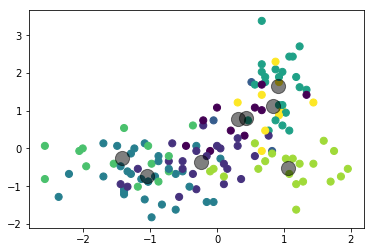

In [9]:
plt.scatter(X_train[:,0],X_train[:,1],c = labels , s=50 ,cmap ='viridis')

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);

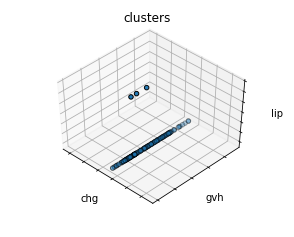

In [10]:
estimators = [('k_means_ecoli_8', KMeans(n_clusters=8))]

fignum = 1
titles = ['clusters']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1],elev=48,azim=134)
    est.fit(X_train)
    labels = est.labels_

    ax.scatter(X_train[:, 3], X_train[:, 0], X_train[:, 2], edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('chg')
    ax.set_ylabel('gvh')
    ax.set_zlabel('lip')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

### 3.Try running DBSCAN on it. You may use 0.1 as the value for eps and 6 as the value for min_samples in DBSCAN. Do you get the same number of clusters with K-means and DBSCAN? Why?

In [11]:
# Compute DBSCAN

from sklearn.cluster import DBSCAN

In [12]:
#cluster = 6,eps = 0.1
db = DBSCAN(eps=0.1, min_samples=6).fit(X_train)

#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
 
 
    
print(labels)

#Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(n_clusters_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
0


### Conclusion

I ran K-means with default number of clusters = 8 .But when I ran DBSCAN  I am not getting any clusters ,beacause eps = 0.1 is small value and define all data points as noise. 
